<a href="https://colab.research.google.com/github/buxkirill/reboot_DA/blob/main/ml/homeworks/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
#uploaded = files.upload()

ДЗ №2


Файл titanicdf.csv, задачи:


1. Предобработать данные (пропуски, замена текста, дубликаты и т.д)
2. Использовать для классификации sklearn.ensemble.RandomForestClassifier
3. Подобрать лучшие гиперпараметры (n_estimators, criterion, max_depth)
4. Провести кроссвалидацию модели
5. Оценить метрики бинарной классификации (Precision, recall, f1)
6. Построить ROC-кривую для оценки качества классификатора

In [107]:
df = pd.read_csv('titanic.csv', sep=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [108]:
df.drop_duplicates(inplace=True)
df.Age.fillna(value=df.Age.mean(), inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [109]:
X_train, X_test, y_train, y_test =  train_test_split(df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']], 
                                                     df.Survived)

In [110]:
params = {'n_estimators': [40, 60, 80, 100, 120, 140, 160, 180],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 2, 4, 6, 8, 10]}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params)
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 60}

In [111]:
clf = RandomForestClassifier(criterion='gini', max_depth=6, n_estimators=60, random_state=42)

In [112]:
cv = KFold(n_splits=5, random_state=42)
metrics = ['precision', 'recall', 'f1']
for metric in metrics:
  print(f'Cross validation with {metric} is:', cross_val_score(clf, X_train, y_train, cv=cv, scoring=metric).mean())


Cross validation with precision is: 0.7942803548480704
Cross validation with recall is: 0.6922771367492996
Cross validation with f1 is: 0.7381150869188586


In [114]:
clf.fit(X_train, y_train)
print('Precision', precision_score(y_test, clf.predict(X_test)))
print('Recall', recall_score(y_test, clf.predict(X_test)))
print('F1', f1_score(y_test, clf.predict(X_test)))
print('roc_auc_score', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Precision 0.7611940298507462
Recall 0.6455696202531646
F1 0.6986301369863013
roc_auc_score 0.8575509845288327


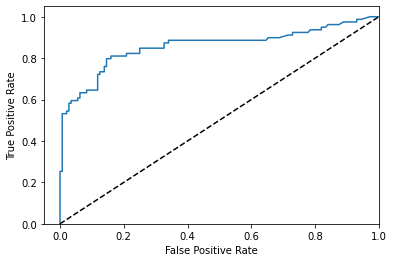

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()